# 03 - Tutorial Titanic Survived Passangers (lazypredict) 

by: Irfan Imaduddin <br>
ref: https://lazypredict.readthedocs.io/en/latest/ <br>
contact: irfanimaduddin[at]gmail.com <br>

---

## Setup

Import modules

In [1]:
import ipywidgets
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import lazypredict
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings("ignore")

d:\project\machine learning\venv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Read files

In [2]:
df_train = pd.read_csv("train_clean.csv")
df_test = pd.read_csv("test_clean.csv")
df_result = pd.read_csv("gender_submission.csv")

## Inspect Data

In [3]:
df_train.head()

,Survived,Pclass,Cat_family,encoded_sex,encoded_embarked,scaled_age
0,0,3,1,1,2,-0.57
1,1,1,1,0,0,0.66
2,1,3,1,0,2,-0.26
3,1,1,1,0,2,0.43
4,0,3,1,1,2,0.43


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Cat_family        891 non-null    int64  
 3   encoded_sex       891 non-null    int64  
 4   encoded_embarked  891 non-null    int64  
 5   scaled_age        891 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [5]:
df_test.head()

,Pclass,Cat_family,encoded_sex,encoded_embarked,scaled_age
0,3,1,1,1,0.39
1,3,1,0,2,1.37
2,2,1,1,1,2.55
3,3,1,1,2,-0.20
4,3,1,0,2,-0.60


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Cat_family        418 non-null    int64  
 2   encoded_sex       418 non-null    int64  
 3   encoded_embarked  418 non-null    int64  
 4   scaled_age        418 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 16.5 KB


In [7]:
df_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### Summary
  
1. **Variable Description** <br>
    a. `Survived`: survival label as the **target** or **dependent** variable (`1` = survived passenger, `0` = not survived or died passenger). <br>
    b. `Pclass`: passenger class. The values are `1`, `2` and `3` which represents for the first class (upper deck), the second class (middle deck) and the third class (lower deck), respectively. <br>
    c. `Cat_family`: number of family abroad on the Titanic. Sum of number of siblings/spouses with parents/children. <br>
    d. `encoded_sex`: encoded gender of passenger. (`1` for `male` and `0` for `female`) <br> 
    e. `encoded_embarked`: encoded port of embarkation for every passenger. `0` for `C` (Cherbourg), `1` for `Q` (Queenstown) and `2` for `S` (Southampton). <br>
    f. `scaled_age`: scaled age of passenger using StandardScaler. <br><br>

2. **Feature types** <br>
    a. **Categorical** : `Survived`, `Pclass`, `Cat_family`, `encoded_sex`, `encoded_embarked`, `scaled_age` <br>
    b. **Numerical** : `scaled_age` <br><br>

3. **Length of dataset** <br>
    a. `df_train` = 891 <br>
    b. `df_test` = 418 <br>
    c. `df_result` = 418 <br> <br>

## Splitting Dataset

Define independent and dependent (target) features

In [9]:
from sklearn.model_selection import train_test_split

y = df_train['Survived']
X = df_train.drop('Survived', axis=1)

# Divide train dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, # Independent variables
    y, # Dependent variable
    test_size=0.25, # Fraction of test set
    random_state=2022 # Random number seed
)

Set test sets

In [10]:
X_test = df_test
y_test = df_result['Survived']

## I am too lazy to create thousand rows of code, so I use LazyPredict 

There are 30+ models can be used in Lazy Predict for classification. More info, please see https://lazypredict.readthedocs.io.

### Let's train the model using training and validation sets

Define the model

In [11]:
clf = LazyClassifier(
    verbose=0, 
    ignore_warnings=True,
    custom_metric=None, # Metrics by default are "Accuracy", "Balanced Accuracy", "ROC AUC", "F1 Score" and "Time Taken"
    classifiers="all" # Can be customized using list
)

Train the model

In [12]:
models_train, predictions_train = clf.fit(X_train, X_valid, y_train, y_valid)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.18it/s]


Print all model performances

In [13]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.83,0.82,0.82,0.83,0.10
NearestCentroid,0.83,0.81,0.81,0.83,0.01
RidgeClassifierCV,0.83,0.81,0.81,0.83,0.01
LogisticRegression,0.83,0.81,0.81,0.83,0.02
QuadraticDiscriminantAnalysis,0.82,0.81,0.81,0.82,0.01
LinearDiscriminantAnalysis,0.83,0.81,0.81,0.83,0.01
RidgeClassifier,0.83,0.81,0.81,0.83,0.01
LinearSVC,0.83,0.80,0.80,0.82,0.02
CalibratedClassifierCV,0.83,0.80,0.80,0.82,0.08


Plot accuracy scores

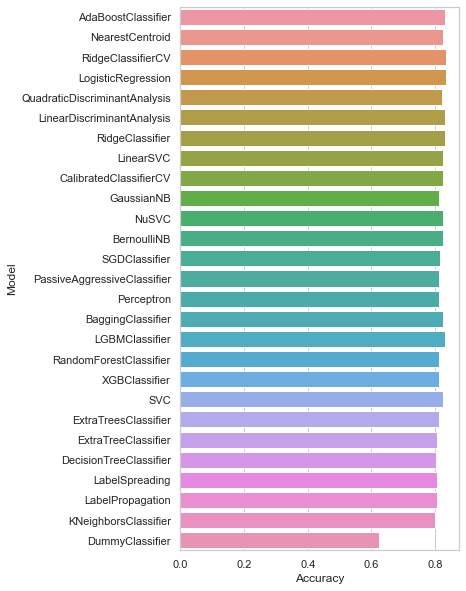

In [14]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=models_train, x="Accuracy", y=models_train.index)
plt.show()

### Now test the model using training and test sets

Define the model

In [15]:
clf = LazyClassifier(
    verbose=0, 
    ignore_warnings=True,
    custom_metric=None, # Metrics by default are "Accuracy", "Balanced Accuracy", "ROC AUC", "F1 Score" and "Time Taken"
    classifiers="all" # Can be customized using list
)

Test the model

In [16]:
models_test, predictions_test = clf.fit(X, X_test, y, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


Print all model performances

In [17]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.99,0.98,0.98,0.99,0.01
NuSVC,0.98,0.97,0.97,0.98,0.04
PassiveAggressiveClassifier,0.96,0.97,0.97,0.96,0.02
LinearSVC,0.97,0.97,0.97,0.97,0.03
LinearDiscriminantAnalysis,0.97,0.97,0.97,0.97,0.01
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.09
RidgeClassifierCV,0.97,0.96,0.96,0.97,0.01
RidgeClassifier,0.97,0.96,0.96,0.97,0.02
LogisticRegression,0.95,0.95,0.95,0.95,0.01


Plot accuracy scores

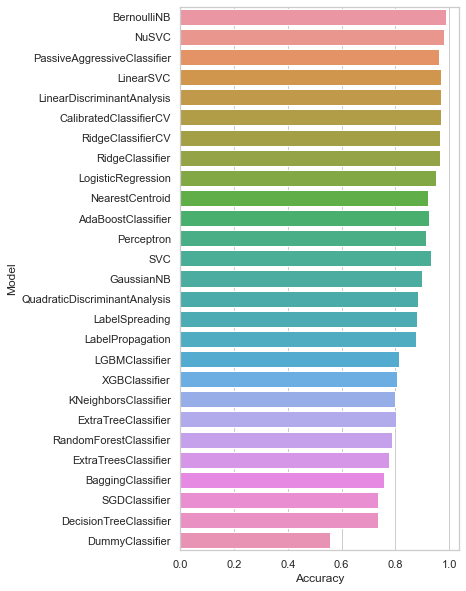

In [18]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=models_test, x="Accuracy", y=models_test.index)
plt.show()